<a href="https://colab.research.google.com/github/yashirmehmood/DataAnalysis/blob/main/DataAnalysis_on_WHO_suicide_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/All Data Files/

/content/drive/MyDrive/Colab Notebooks/All Data Files


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and assign it to the variable data
data = pd.read_csv('who_suicide_statistics.csv')

# View the first few lines of data
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [ ]:
print('mean of suicide case=',data['suicides_no'].mean())
print('median of suicide case=',data['suicides_no'].median())
print('=======================================================')
data['suicides_no'] = data['suicides_no'].fillna(0)
print(data.info())
print('=======================================================')
print('mean of suicide case=',data['suicides_no'].mean())

mean of suicide case= 193.3153901734104
median of suicide case= 14.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  43776 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB
None
mean of suicide case= 183.35286458333334


In [ ]:
cleaned_data = data.dropna()

sex
female    95790
male      95790
dtype: int64


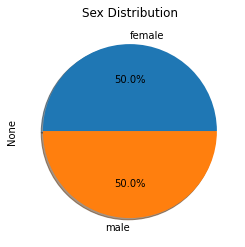

In [ ]:
# Show the Distribution of Sex
sex_dist = cleaned_data.groupby('sex').count().sum(axis=1)
print(sex_dist)
sex_dist.plot(kind='pie', title="Sex Distribution", shadow=True, autopct='%1.1f%%');

In [ ]:
# Distribution of Gender wise
print(data.groupby('sex')['suicides_no'].sum())

sex
female    1902272.0
male      6124183.0
Name: suicides_no, dtype: float64


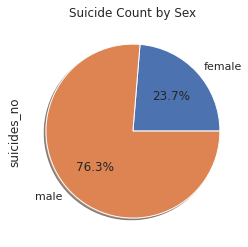

In [ ]:
# Count the Suicides by Males and Females vise
sns.set()

suicide_numbers_by_sex = data['suicides_no'].dropna().groupby(data['sex']).sum() / 1000000
suicide_numbers_by_sex.plot(kind='pie', title="Suicide Count by Sex", shadow=True, autopct='%1.1f%%');

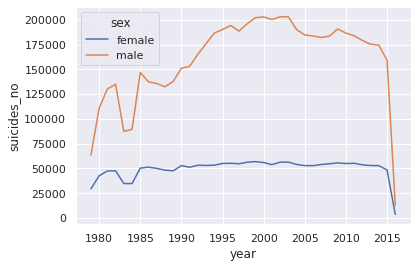

In [ ]:
# Suicide numbers in every year by gender
sex_wise_data = pd.DataFrame(cleaned_data.groupby(["sex", "year"])['suicides_no'].sum().reset_index())

sns.lineplot(x='year', y='suicides_no', hue='sex', data=sex_wise_data);

In [ ]:
# Distribution of Age wise
print(data.groupby('age')['suicides_no'].sum())

age
15-24 years     984287.0
25-34 years    1367333.0
35-54 years    2895388.0
5-14 years       63312.0
55-74 years    1958468.0
75+ years       757667.0
Name: suicides_no, dtype: float64


In [ ]:
# Distribution of country wise
countries_data=data.groupby('country')['suicides_no'].sum()
print(countries_data)


country
Albania                                1970.0
Anguilla                                  2.0
Antigua and Barbuda                      11.0
Argentina                             93862.0
Armenia                                2422.0
                                       ...   
Uruguay                               14647.0
Uzbekistan                            44063.0
Venezuela (Bolivarian Republic of)    29504.0
Virgin Islands (USA)                    113.0
Zimbabwe                                764.0
Name: suicides_no, Length: 141, dtype: float64


In [ ]:
print(data.isnull().sum())
print(data.age.unique())

country           0
year              0
sex               0
age               0
suicides_no       0
population     5460
dtype: int64
['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


In [ ]:
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Dropping the null rows
suicide_numbers_col=cleaned_data.loc[:,'suicides_no']
population_col=cleaned_data['population']
per_million_pop=population_col/1000000
cleaned_data['suicide_rate_per_million']=suicide_numbers_col/per_million_pop
print(cleaned_data.head())

   country  year     sex  ... suicides_no  population  suicide_rate_per_million
0  Albania  1985  female  ...         0.0    277900.0                       0.0
1  Albania  1985  female  ...         0.0    246800.0                       0.0
2  Albania  1985  female  ...         0.0    267500.0                       0.0
3  Albania  1985  female  ...         0.0    298300.0                       0.0
4  Albania  1985  female  ...         0.0    138700.0                       0.0

[5 rows x 7 columns]


In [ ]:
cleaned_data.loc[:, 'age'] = cleaned_data['age'].str.replace(' years','')
age_categories = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
cleaned_data.age = cleaned_data.age.astype(CategoricalDtype(categories=age_categories, ordered=True))

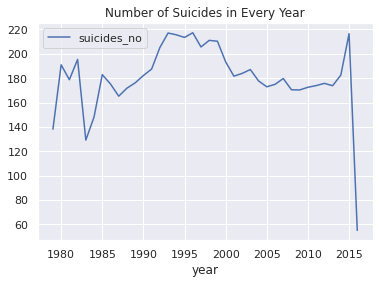

In [ ]:
#Count The Suicides in Every Year
sns.set()

mean_suicides_years = data[['year', 'suicides_no']].groupby('year').mean()
mean_suicides_years.plot(kind='line', grid=True, legend=True, title="Number of Suicides in Every Year");

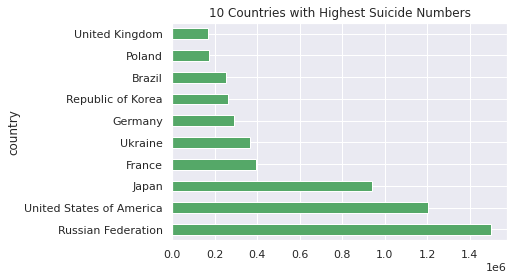

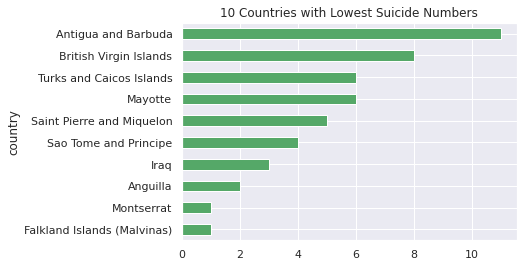

In [ ]:
# Top 10 Countries with Highest suicides
highest_values_by_countries = data['suicides_no'].dropna().groupby(data['country']).sum().nlargest(10)
# Top 10 Countries with Lowest suicides
lowest_values_by_countries = data['suicides_no'].dropna().groupby(data['country']).sum().nsmallest(10)

highest_values_by_countries.plot(kind='barh', title="10 Countries with Highest Suicide Numbers", figsize=(6,4), color='g')
plt.show()

lowest_values_by_countries.plot(kind='barh', title="10 Countries with Lowest Suicide Numbers", figsize=(6,4), color='g')
plt.show()

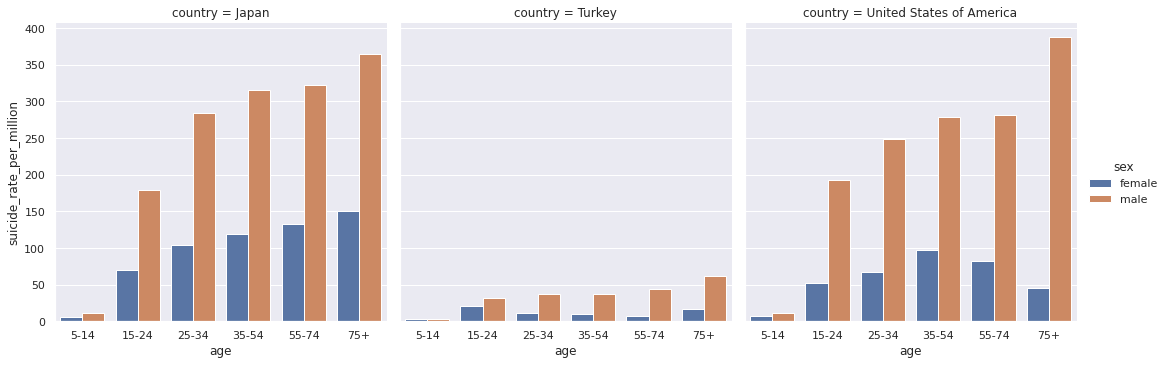

In [ ]:
sns.set()

tr_canada_japan_2015 = (cleaned_data.loc[(cleaned_data['country'].isin(['Turkey', 'United States of America', 'Japan'])) 
                                        & (cleaned_data['year'] == 2015), ['country', 'sex', 'age', 'suicide_rate_per_million']].sort_values(['sex', 'age']))
sns.catplot(x='age', hue='sex', col='country', y='suicide_rate_per_million', data=tr_canada_japan_2015, kind='bar', col_wrap=3)

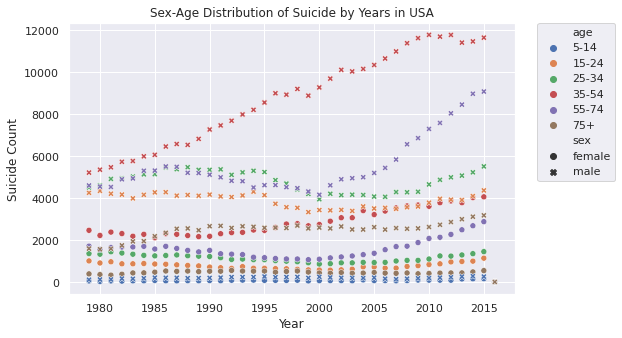

In [ ]:
# Visualizing USA Data

usa_suicide_count = cleaned_data.suicides_no[cleaned_data.country == "United States of America"]

plt.figure(figsize=(8,5))
(sns.scatterplot(x=cleaned_data.year[cleaned_data.country == "United States of America"], y=usa_suicide_count, hue=cleaned_data.age, style=cleaned_data.sex)
 .set_title("Sex-Age Distribution of Suicide by Years in USA"));
plt.xlabel("Year")
plt.ylabel("Suicide Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

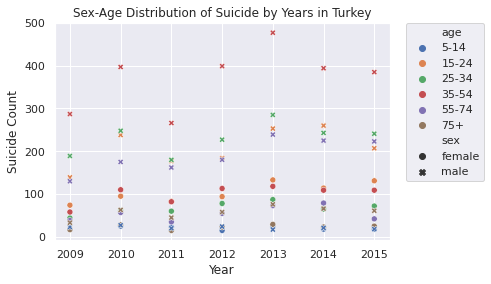

In [ ]:
# Visualizing Turkey Data
sns.set()

turkey_suicide_count = cleaned_data.suicides_no[cleaned_data.country == "Turkey"]
t = (sns.scatterplot(x=cleaned_data.year[cleaned_data.country == "Turkey"], y=turkey_suicide_count, hue=cleaned_data.age, style=cleaned_data.sex)
     .set_title("Sex-Age Distribution of Suicide by Years in Turkey"));
plt.xlabel("Year")
plt.ylabel("Suicide Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

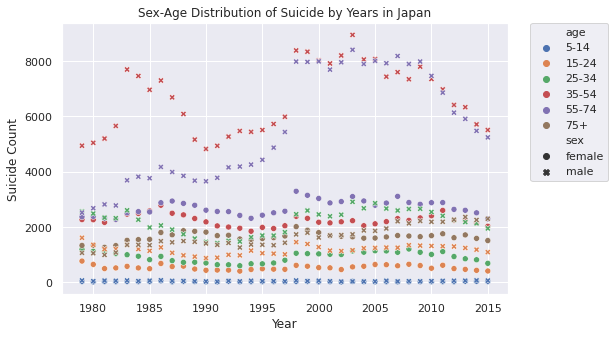

In [ ]:
# Visualizing Japan Data

japan_suicide_count = cleaned_data.suicides_no[cleaned_data.country == "Japan"]

plt.figure(figsize=(8,5))
(sns.scatterplot(x=cleaned_data.year[cleaned_data.country == "Japan"], y=japan_suicide_count, hue=cleaned_data.age, style=cleaned_data.sex)
 .set_title("Sex-Age Distribution of Suicide by Years in Japan"));
plt.xlabel("Year")
plt.ylabel("Suicide Count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);